In [2]:
# Data science libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# NLP libraries
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer


In [3]:
# Load csv
df = pd.read_csv('data/goemotions.csv')

# Show first 5 rows
df.head()

text     emotion
0                                        We can hope    optimism
1                     Shhh don't give them the idea!       anger
2  Thank you so much, kind stranger. I really nee...   gratitude
3  Ion know but it would be better for you to jus...     neutral
4  I'm honestly surprised. We should have fallen ...  excitement

Este dataset contiene dos columnas, una con el texto y otra con la emoción

# Comprobar si hay duplicados

In [4]:
# Number of duplicate rows
df.duplicated().sum()

53525

In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(118295, 2)

# Comprobar los tipos de los datos y si hay valores nulos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118295 entries, 0 to 171819
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   text     118295 non-null  object
 1   emotion  118295 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [7]:
df.describe()

text  emotion
count                                              118295   118295
unique                                              56452       28
top     Hi, [NAME]! I am stopping by to wish you the b...  neutral
freq                                                    6    31446

Ambas columnas son de tipo objeto

In [8]:
df.isnull().sum()

text       0
emotion    0
dtype: int64

No hay duplicados

# Análisis de class imbalance

In [9]:
# check class imbalance in percentage
df['emotion'].value_counts(normalize=True) * 100

emotion
neutral           26.582696
approval           7.537935
admiration         5.773701
annoyance          5.762712
disapproval        5.045860
curiosity          3.457458
realization        3.432943
anger              3.368697
disappointment     3.354326
gratitude          3.304451
amusement          3.277400
confusion          3.265565
optimism           2.978148
joy                2.858109
love               2.499683
sadness            2.473477
caring             2.317089
surprise           2.201276
excitement         2.082083
disgust            1.997549
desire             1.421869
fear               1.094721
embarrassment      1.011877
remorse            0.940868
nervousness        0.590896
relief             0.575679
pride              0.530031
grief              0.262902
Name: proportion, dtype: float64

Vamos a quitar aquellas emociones que aparecen menos del 1% de las veces, porque tenemos suficientes datos aún así.

In [10]:
# Remove emotions that have less than 1% of the data (df['emotion'].value_counts(normalize=True) * 100) < 1
df = df[df['emotion'].map(df['emotion'].value_counts(normalize=True) * 100 >= 1)]

In [11]:
df['emotion'].value_counts(normalize=True) * 100

emotion
neutral           27.376724
approval           7.763094
admiration         5.946162
annoyance          5.934845
disapproval        5.196580
curiosity          3.560733
realization        3.535485
anger              3.469320
disappointment     3.454520
gratitude          3.403155
amusement          3.375296
confusion          3.363108
optimism           3.067105
joy                2.943481
love               2.574349
sadness            2.547360
caring             2.386300
surprise           2.267029
excitement         2.144275
disgust            2.057215
desire             1.464340
fear               1.127420
embarrassment      1.042102
Name: proportion, dtype: float64

# Procesamiento de texto

In [12]:
# Download stopwords and wordnet
nltk.download("stopwords")
nltk.download("wordnet")

# Remove special characters
def remove_special_characters(sentences, remove_digits=False):
    clean_sentences = []
    for sent in sentences:
        pattern = r'/[^\w-]|_/' if not remove_digits else r'[^a-zA-Z\s]'  
        clean_text = re.sub(pattern, '', sent)
        clean_sentences.append(clean_text)
    print(clean_sentences)
    return clean_sentences

# Load stopwords
stop_words = stopwords.words("english")
# Create lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/blanca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/blanca/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Apply remove_special_characters
df["clean_text"] = remove_special_characters(df["text"], remove_digits=True)

# Apply lemmatization
df["clean_text"] = df["clean_text"].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

# Remove stopwords
df["clean_text"] = df["clean_text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

['Shhh give idea', 'Thank much kind stranger I really need', 'Ion know would better buy trim make yourself hard dose', 'Im honestly surprised We fallen much farther', 'Jurisprudence fetishist gets technicality', 'One worst nightmares Ugh', 'Is real ', 'My favorite pod fresh  clear Sadly recent packs look like dark brown syrup pods', 'Forgot like actually dislike one patients', 'Still better YouTube rewind', 'end friendship go meet people Youre prolonging obvious', 'I want pizza flair', 'That disgusting VWP', 'Im worried dude getting pissed shoes', 'That really sucks How old baby', 'Please keep going making look worse', 'I get it Are upset men using blue nametags blue color boys what', 'And course non working class tax rises cuts irrelevance skew Labour', 'And course need make sure its boiled hard side finest jelly beans raw', 'In cap era goalie played much NAME last  years per games basis', 'She knows audience ', 'Bringing bag ultimate newbie move', 'I completely lost voice period This

In [30]:
df.head()

text     emotion  \
1                                    Shhh give idea!       anger   
2           Thank much, kind stranger. I really need   gratitude   
3  Ion know would better buy trim make yourself, ...     neutral   
4     I'm honestly surprised. We fallen much farther  excitement   
5         Jurisprudence fetishist gets technicality.     neutral   

                                      clean_text  
1                                 Shhh give idea  
2         Thank much kind stranger I really need  
3  Ion know would better buy trim make hard dose  
4   Im honestly surprised We fallen much farther  
5       Jurisprudence fetishist get technicality

# Distribución de frecuencias

In [15]:
# Get the number of occurrences of every word in the dataset in a dataframe
word_freq = pd.Series(" ".join(df["clean_text"]).split()).value_counts()
word_freq_table = pd.DataFrame(word_freq).reset_index()
word_freq_table.columns = ["Word", "Frequency"]
word_freq_table.head()

Word  Frequency
0       I      38394
1  [NAME]      15591
2    like       8630
3     get       4609
4   would       4544

En este dataset todos los nombres se han sustituido por [NAME], por lo que vamos a ver cómo se quedaría la distribución de palabras sin esta

In [16]:
# delete [NAME] from word_freq
word_freq = word_freq.drop("[NAME]", errors="ignore")

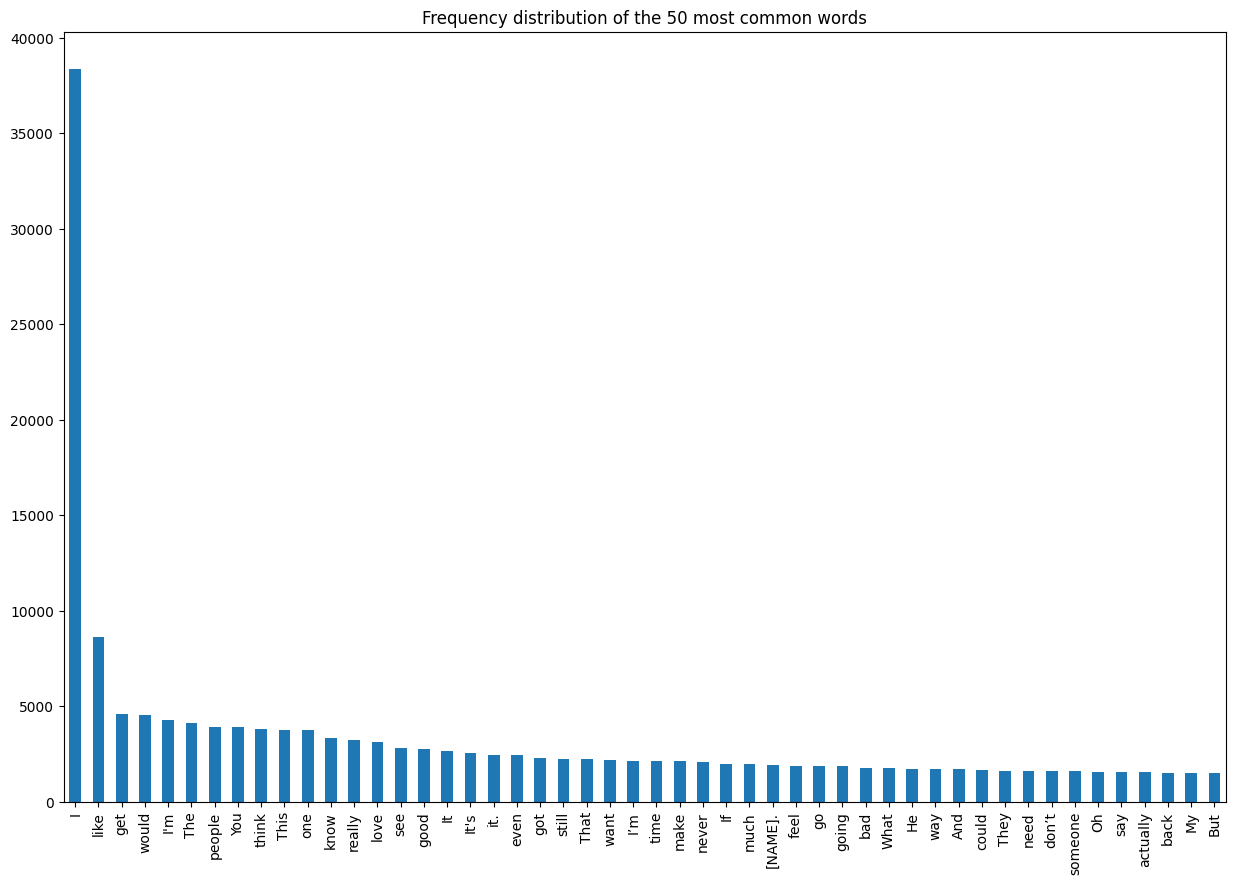

In [17]:
# Plot the frequency distribution of the 50 most common words in the dataset
plt.figure(figsize=(15, 10))
word_freq[:50].plot(kind="bar")
plt.title("Frequency distribution of the 50 most common words")
plt.show()

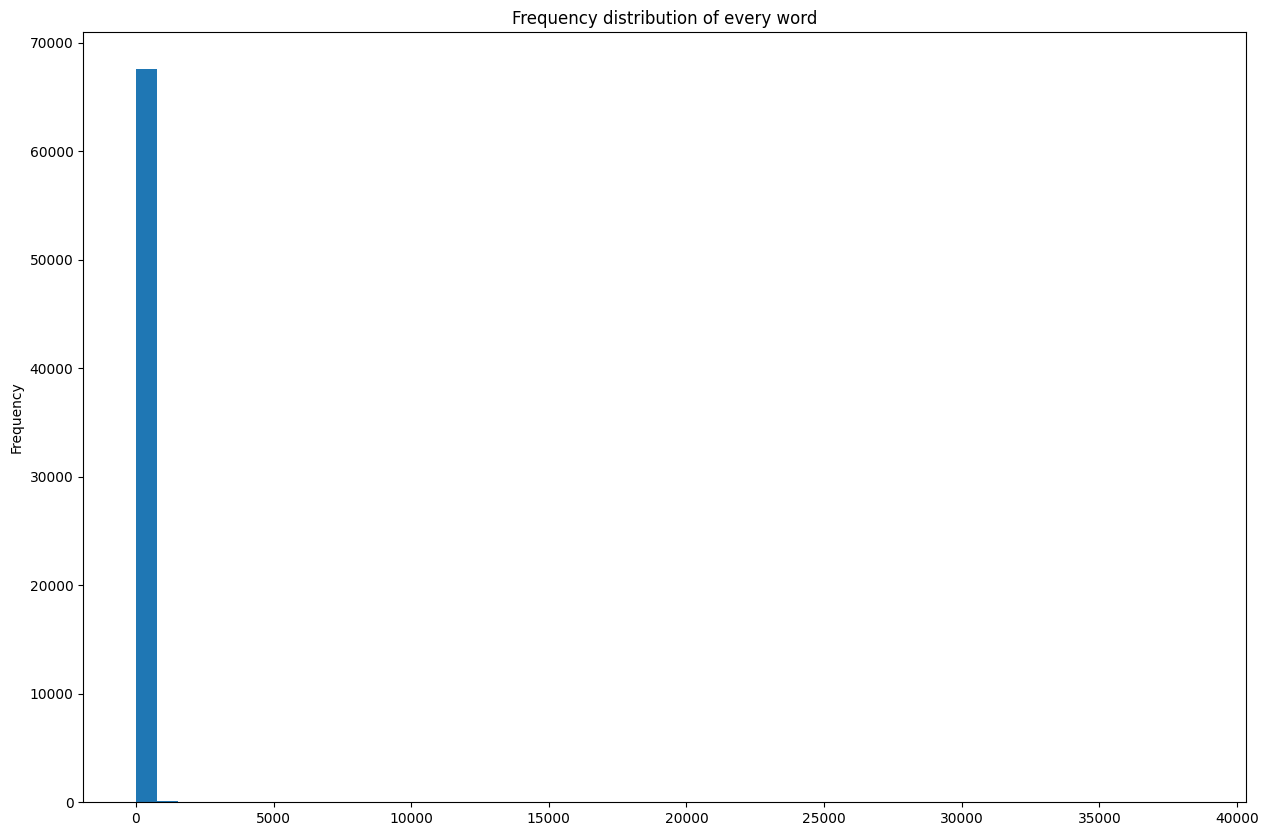

In [18]:
# Plot the frequency distribution of every word in the dataset
plt.figure(figsize=(15, 10))
word_freq.plot(kind="hist", bins=50)
plt.title("Frequency distribution of every word")
plt.show()

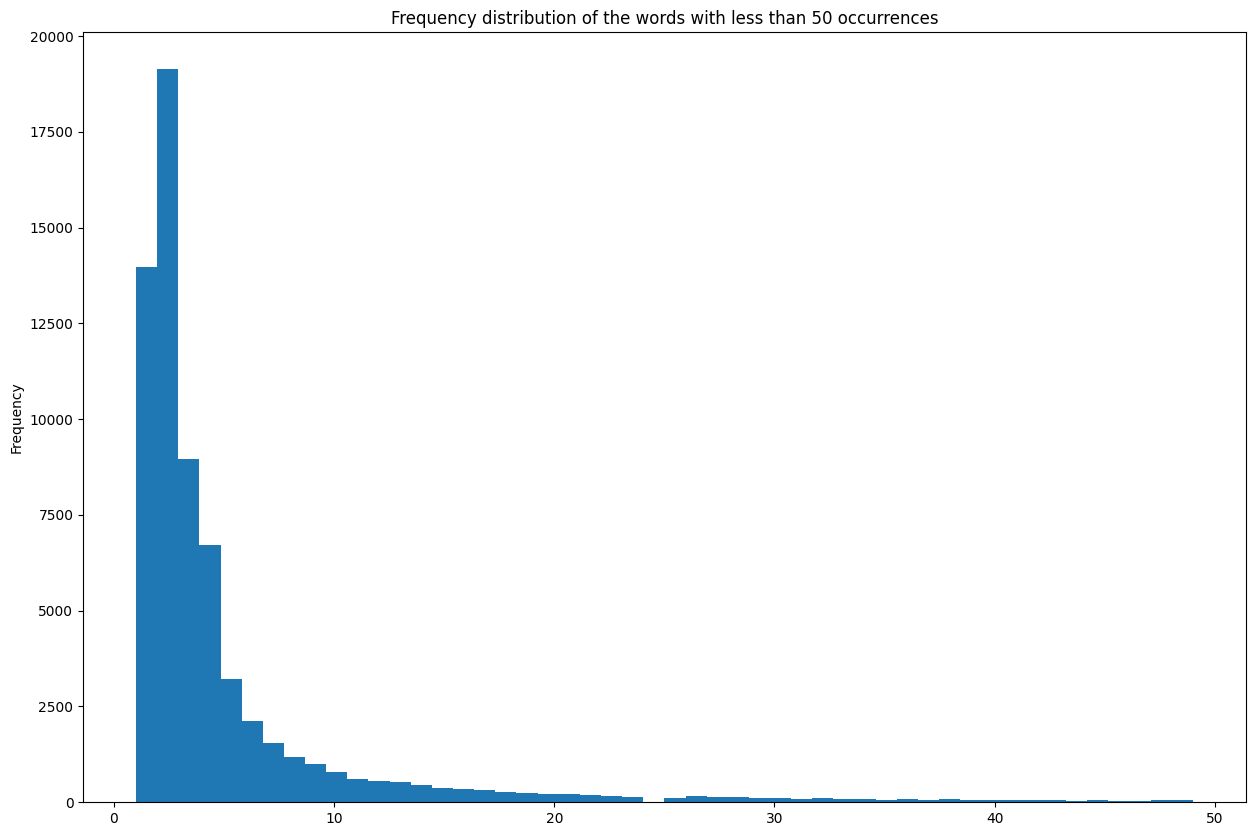

In [19]:
# Plot the frequency distribution of the words with less than 50 occurrences
plt.figure(figsize=(15, 10))
word_freq[word_freq < 50].plot(kind="hist", bins=50)
plt.title("Frequency distribution of the words with less than 50 occurrences")
plt.show()

In [20]:
# Print the number of different words in the dataset
print(f"Number of different words in the dataset: {len(word_freq)}")
# Create a table with the number of words with less than 10, 5, 3 and 2 occurrences. Two columns: frequency and number of words
words_10 = len(word_freq[word_freq < 10])
words_5 = len(word_freq[word_freq < 5])
words_3 = len(word_freq[word_freq < 3])
words_2 = len(word_freq[word_freq < 2])
words_table = pd.DataFrame(
    {
        "Frequency": [10, 5, 3, 2],
        "Number of words": [words_10, words_5, words_3, words_2]
    }
)
words_table

Number of different words in the dataset: 67707


Frequency  Number of words
0         10            57841
1          5            48763
2          3            33105
3          2            13965

In [21]:
# Create a dictionary with the words and their frequency for faster access
word_freq_dict = word_freq.to_dict()

# Distribución del la longitud del texto

In [22]:
# Get the length of every text
df["text_length"] = df["clean_text"].apply(lambda x: len(x.split()))
df.head()

text     emotion  \
0                                        We can hope    optimism   
1                     Shhh don't give them the idea!       anger   
2  Thank you so much, kind stranger. I really nee...   gratitude   
3  Ion know but it would be better for you to jus...     neutral   
4  I'm honestly surprised. We should have fallen ...  excitement   

                                          clean_text  text_length  
0                                            We hope            2  
1                                    Shhh give idea!            3  
2           Thank much, kind stranger. I really need            7  
3  Ion know would better buy trim make yourself, ...           10  
4     I'm honestly surprised. We fallen much farther            7

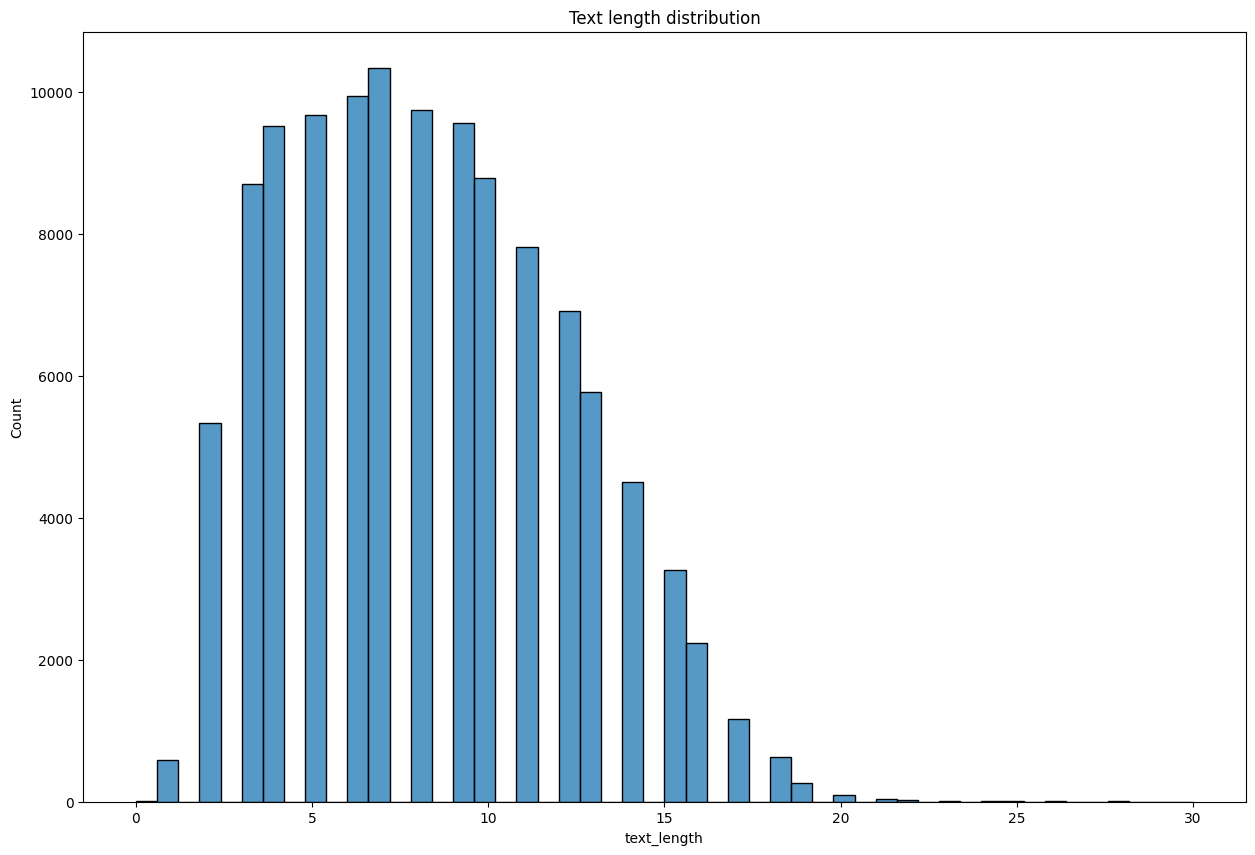

In [23]:
# plot text length distribution
plt.figure(figsize=(15, 10))
sns.histplot(df["text_length"], bins=50)
plt.title("Text length distribution")
plt.show()


In [24]:
# Drop the headlines with 2 or less elements
short_texts = df[df["text_length"] <= 2]
print(f"Number of texts with 2 or less elements: {short_texts.shape[0]}")

# Drop the headlines with 2 or less elements
df = df[df["text_length"] > 2]

Number of texts with 2 or less elements: 5918


In [25]:
# Drop headlines with 20 or more
long_texts = df[df["text_length"] >= 20]
print(f"Number of texts with 20 or more elements: {long_texts.shape[0]}")

# Drop the headlines with 20 or more elements
df = df[df["text_length"] < 20]

Number of texts with 20 or more elements: 181


# Save csv

In [26]:
# Keep the columns clean_text (rename it as text) and emotion
df = df[["clean_text", "emotion"]]
df.columns = ["text", "emotion"]
df.head()

text     emotion
1                                    Shhh give idea!       anger
2           Thank much, kind stranger. I really need   gratitude
3  Ion know would better buy trim make yourself, ...     neutral
4     I'm honestly surprised. We fallen much farther  excitement
5         Jurisprudence fetishist gets technicality.     neutral

In [27]:
# Let's save the preprocessed dataset into a CSV file, so we can use it in following notebooks. Before doing so, we'll remove the empty rows
df.dropna(inplace=True)
df.to_csv("data/goemotions_clean.csv", index=False)

# Word cloud


In [28]:
text = " ".join(df["clean_text"]).replace("[NAME]", "")

# Ahora generamos el word cloud sin la palabra [NAME]
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

# Plotear el word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud sin la palabra [NAME]")
plt.show()


KeyError: 'clean_text'

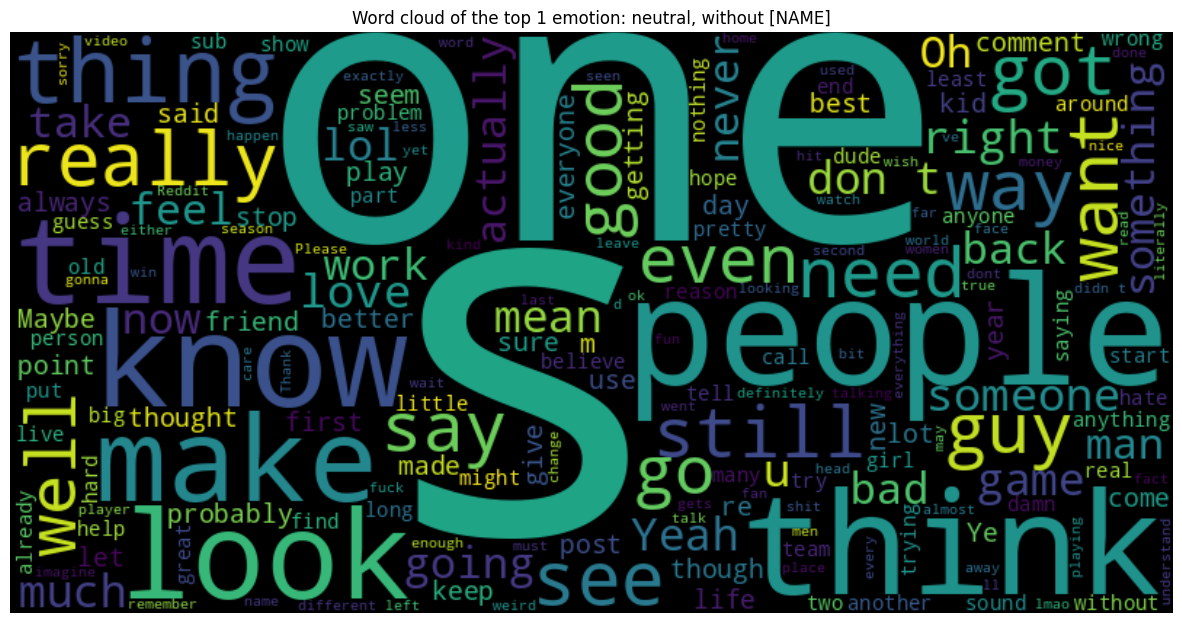

In [ ]:
# Filtrar el dataframe para obtener solo los registros con la emoción "neutral"
neutral = df[df["emotion"] == "neutral"]

# Unir todos los textos marcados como 'neutral' en una sola cadena y reemplazar [NAME] con un string vacío
text = " ".join(neutral["clean_text"]).replace("[NAME]", "")

# Generar el word cloud sin la palabra [NAME]
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

# Plotear el word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the top 1 emotion: neutral, without [NAME]")
plt.show()


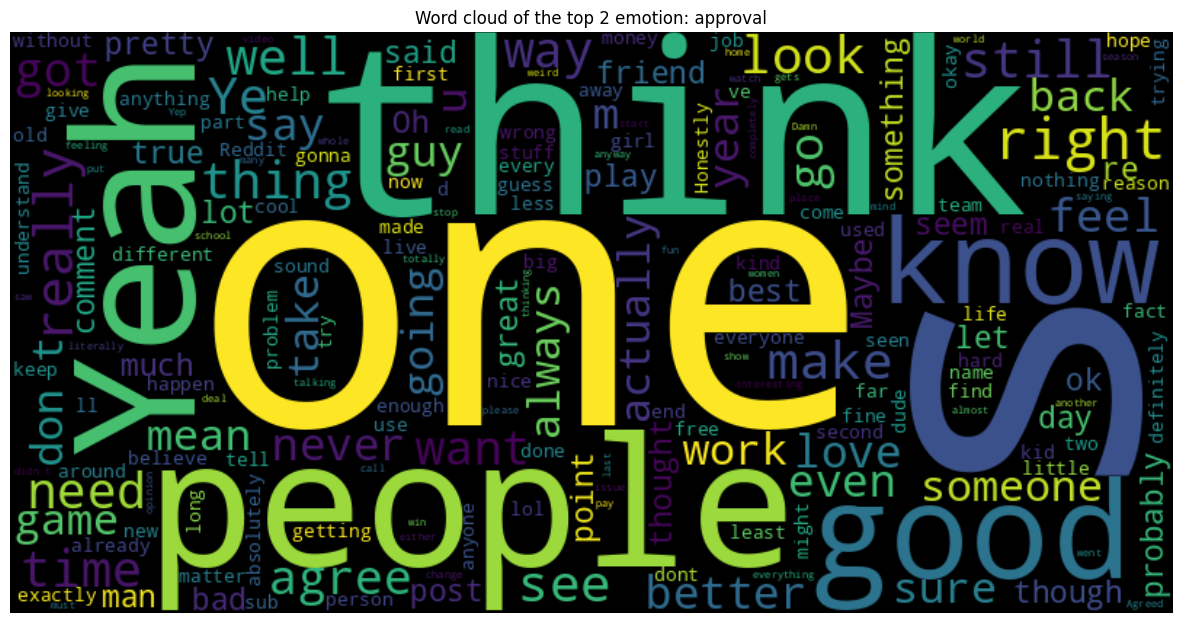

In [ ]:
# word cloud of the top 2 emotion: approval
approval = df[df["emotion"] == "approval"]

text = " ".join(approval["clean_text"]).replace("[NAME]", "")

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the top 2 emotion: approval")
plt.show()

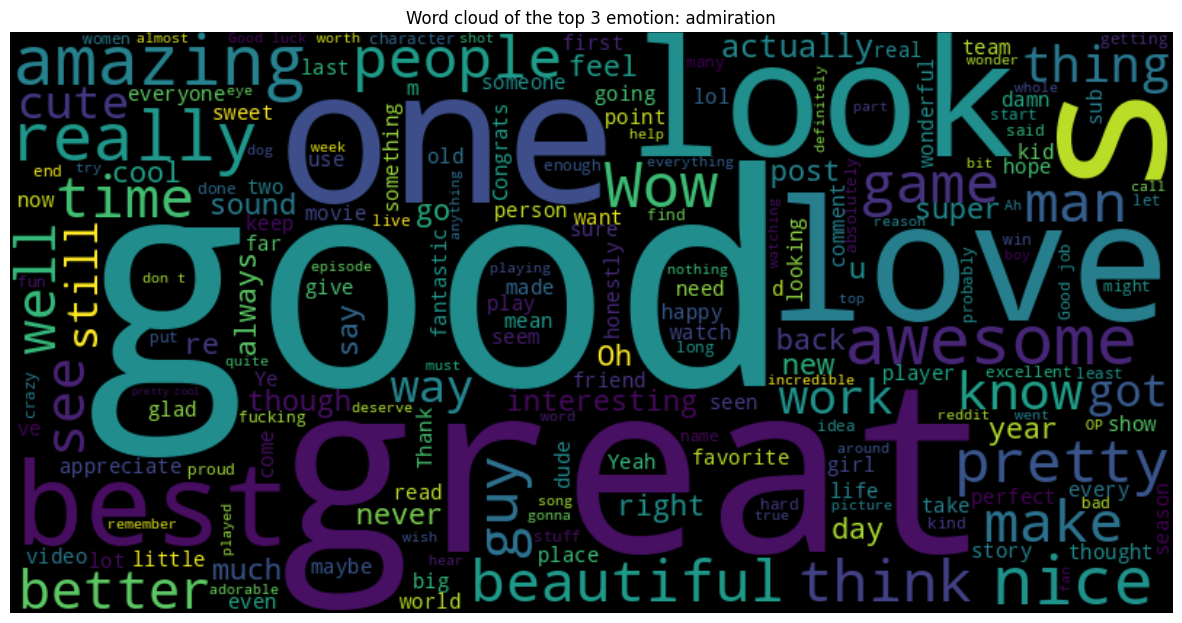

In [ ]:
# word cloud of the top 3 emotion: admiration
admiration = df[df["emotion"] == "admiration"]

text = " ".join(admiration["clean_text"]).replace("[NAME]", "")

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word cloud of the top 3 emotion: admiration")
plt.show()
